In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np


# Что делаем?

<b> Постановка задачи:</b> есть трехслойниый симметричный волновод толщиной $d$, показатели преломления обкладок - $n_0$, сердцевины - $n_1$. В него попадает ЭМ волна с волновым числом $k$ и возбуждает 0ю моду. Ориентация кристалла -  ось 100 кристалла ориентирована под углом $\phi$ к проекции волнового вектора на плоскость ХУ, ось 001.

<b> Цель:</b>  получить зависимость поля ОЭКМ от параметров.

Большая часть поворотов, умножений, взятия производных матриц и тензоров была проделана в ВФ Математике, здесь будет решение модового уравнения и последующее построение графиков распределения полей в зависимости от значения параметров

вывод формул ОЭКМ в <code>waveguide ICME.nb</code> 




![shit](1x/2.png)

In [2]:
width = 0.6
n1 = 1.5
n2 = np.sqrt(5.5)
n3 = n1

# mode eqs

def TE_mode_eq(k, beta, N=0):
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)
    tmp = np.arctan(q*(p+r)/(q*q - p*r))
    if (q*q - p*r) < 0:
        tmp += np.pi
        
    return np.real(width*q - np.pi*(N) - tmp)

def TM_mode_eq(k, beta, N=0):
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    r = np.sqrt(beta**2 - (k*n3)**2)
    return np.real(width*q - np.arctan(n2**2*p/n1**2/q) - np.arctan(n2**2*r/n3**2/q) - np.pi*N)

# get solution for selected lambda

def sol_mode_eq(lam, mode='TE'):
    mode_eq = TE_mode_eq if mode=='TE' else TM_mode_eq
    k = 2*np.pi/lam
    l_b = k*(n1 + 1e-3)
    r_b = k*(n2 - 1e-3)
    # print(k, l_b, r_b)
    
    if mode_eq(k, l_b)*mode_eq(k, r_b) < 0:
        return opt.brentq(lambda x: mode_eq(k, x), l_b, r_b)
    else:
        return None

def get_E_field_TE(beta, lam, z): #TODO make correct normalization
    k = 2*np.pi/lam
    r = np.sqrt(beta**2 - (k*n3)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)
    
    return np.cos(q*z) + r/q*np.sin(q*z)

def get_E_field_TM(beta, lam, z):
    k = 2*np.pi/lam
    p = np.sqrt(beta**2 - (k*n1)**2)
    q = np.sqrt(-beta**2 + (k*n2)**2)

    Ez = beta*(-n1**2*q/(n2**2*p)*np.cos(q*z) - np.sin(q*z))
    Ex = -1j*q*(-n1**2*q/(n2**2*p)*np.sin(q*z) + np.cos(q*z))
    return Ex, Ez

# calculate ICME according to phi 
g1 = 107145
g2 = 59525
g3 = 14880

g1 /= g3
g2 /= g3
g3 /= g3

def ICME_TE(Ey, phi, M):
    m1, m2, m3 = M
    cos = np.cos(phi)
    sin = np.sin(phi)
    Hx = 2*(g2*cos**3*m1 - (g1-2*g3)*(cos**2*m2*sin 
        - cos*m1*sin**2) - g2*m2*sin**3)
    Hy = 2*(g1*cos**3*m2 + (g2+2*g3)*cos**2*sin*m1
        + (g2+2*g3)*cos*sin**2*m2 + g1*sin**3*m1)
    Hz = 2*g2*m3

    Hx *= Ey**2
    Hy *= Ey**2
    Hz *= Ey**2

    return(Hx, Hy, Hz)

def ICME_TM(E, phi, M):
    Ex, Ez = E
    Ex *= Ex
    Ez *= Ez 

    m1, m2, m3 = M
    cos = np.cos(phi)
    sin = np.sin(phi)

    Hx = 2*np.real(-Ex*g1*cos**3*m1 + Ex*(g2 + 2*g3)*cos**2*sin*m2 
        + m2*sin*(-Ez*g2 + Ex*g1*sin**2) 
        + 2*cos*m1*(Ez*g2 - Ex*(g2 + 2*g3)*sin**2))
    Hy = -2*np.real(Ex*g2*cos**3*m2 + Ex*(g1 - 2*g3)*cos**2*sin*m1 
        + g2*m1*sin*(-Ez + Ex*sin**2) + cos*m2*(-Ez*g2 
        + Ex*(g1 - 2*g3)*sin**2))
    Hz = 2*np.real(Ez*g1 - Ex*g2)*m3

    return (Hx, Hy, Hz)

def ICME_arbirtary_E(E, phi, M):
    


{2 (Cos[phi]^3 (Ex Excon g1 M[1] + Ey Eycon g2 M[1] + 
       Excon Ey g3 M[2] + Ex Eycon g3 M[2]) - 
    Cos[phi]^2 (-((Excon Ez + Ex Ezcon) g3 M[
           3]) + (Excon Ey (-g1 + g2 + g3) M[1] + 
          Ex Eycon (-g1 + g2 + g3) M[1] + Ey Eycon (g1 - 2 g3) M[2] + 
          Ex Excon (g2 + 2 g3) M[2]) Sin[phi]) + 
    Sin[phi] (-Ez Ezcon g2 M[2] + (Excon Ez + Ex Ezcon) g3 M[3] Sin[
         phi] + (Excon Ey g3 M[1] + Ex Eycon g3 M[1] - 
          Ex Excon g1 M[2] - Ey Eycon g2 M[2]) Sin[phi]^2) + 
    Cos[phi] (Ez Ezcon g2 M[
         1] + (Ey Eycon (g1 - 2 g3) M[1] + Ex Excon (g2 + 2 g3) M[1] +
           Excon Ey (g1 - g2 - g3) M[2] + 
          Ex Eycon (g1 - g2 - g3) M[2]) Sin[phi]^2)), 

          
 2 (Cos[phi]^3 (Excon Ey g3 M[1] + Ex Eycon g3 M[1] + 
       Ey Eycon g1 M[2] + Ex Excon g2 M[2]) + 
    Cos[phi]^2 ((Eycon Ez + Ey Ezcon) g3 M[
         3] + (Ex Excon (g1 - 2 g3) M[1] + Ey Eycon (g2 + 2 g3) M[1] +
           Excon Ey (-g1 + g2 + g3) M[2] + 
          Ex Eycon (-g1 + g2 + g3) M[2]) Sin[phi]) + 
    Sin[phi] (Ez Ezcon g2 M[1] + (Eycon Ez + Ey Ezcon) g3 M[3] Sin[
         phi] + (Ey Eycon g1 M[1] + Ex Excon g2 M[1] - 
          Excon Ey g3 M[2] - Ex Eycon g3 M[2]) Sin[phi]^2) + 
    Cos[phi] (Ez Ezcon g2 M[
         2] + (Excon Ey (g1 - g2 - g3) M[1] + 
          Ex Eycon (g1 - g2 - g3) M[1] + Ex Excon (g1 - 2 g3) M[2] + 
          Ey Eycon (g2 + 2 g3) M[2]) Sin[phi]^2)), 


 2 (g3 Cos[
      phi] (Excon Ez M[1] + 
       Ex Ezcon M[1] + (Eycon Ez + Ey Ezcon) M[2]) + (Ez Ezcon g1 + 
       Ex Excon g2 + Ey Eycon g2) M[3] + 
    g3 (Eycon Ez M[1] + 
       Ey Ezcon M[1] - (Excon Ez + Ex Ezcon) M[2]) Sin[phi])}

Добавим новый функционал. Прошлый блок был с кодом, который олицетворял решение задачи. Теперь пойдем дальше, у нас есть экспреимент в котором мы не можем менять именно эти углы, эти углы удобны для математического описания. В геометрии установки этип углы так просто не настроить. Начнем с того что в решетке (в которой мы планируем эту моду возбуждать) при фиксированной длине волны не при всяком угле $\phi$(по физическому смыслу это угол между осью 100 вектором распространения моды $\beta$) у нас будет возникать мода. Теперь мы будем дополнительно проверять условие возникновения моды, все новые углы и их смысл отображены на рисунке

![qasd](1x/1.png)

In [ ]:
Пояснение к углам и осям


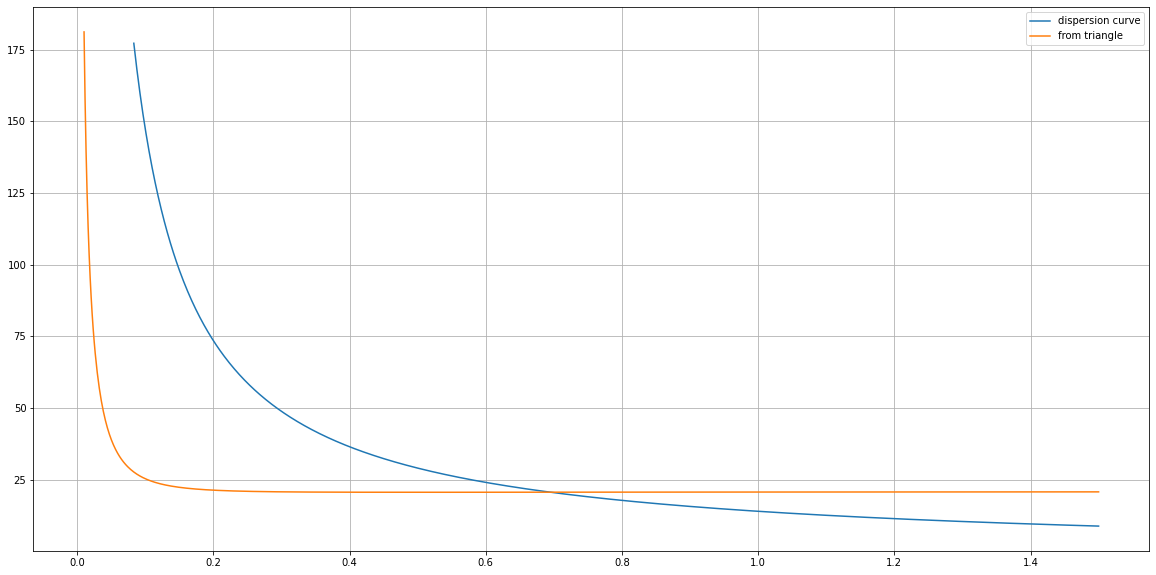

In [26]:
LAM = np.linspace(0.01, 1.5, 1000)
betas = np.array([sol_mode_eq(l, mode='TM') for l in LAM])
plt.figure(figsize=(20, 10))
plt.plot(LAM, betas, label='dispersion curve')

def get_beta_from_triangle(lam, theta, alpha, h, m):
    """
    h - period of structure, m - difraction period 
    """
    ksin = 2*np.pi/lam*np.sin(theta)
    G = 2*np.pi/h*m
    return np.sqrt(ksin**2 + G**2 - 2*ksin*G*np.cos(np.pi/2-alpha))

theta = 17/180*np.pi
alpha = 10/180*np.pi
h = 0.3
m = 1
betas_other = np.array([get_beta_from_triangle(l, theta, alpha, h, m) for l in LAM])
plt.plot(LAM, betas_other, label='from triangle')
plt.grid()
plt.legend()
# betas, betas_other

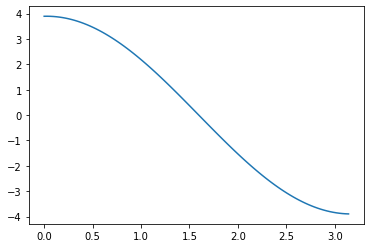

In [32]:
psi = -np.pi/2
phi = np.linspace(0, np.pi, 100)
ksi = np.linspace(0, np.pi, 100)
lam = 1
torque_z = np.zeros(100)

for i, ph in enumerate(phi):
    H_ext = 1 # (0, -1, 0)
    m1 = H_ext*np.cos(ph - psi)
    m2 = -H_ext*np.sin(ph - psi)
    m3 = 1e-3 
    M = (m1, m2, m3)

    beta_TM = sol_mode_eq(lam, mode='TM')

    Z  = np.arange(0, width, width/100)

    E_light = ()


    torque_z[i] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM)[2]

plt.plot(phi, torque_z)

In [ ]:
lam = 1

for phi_d in range(6):
    phi_deg = phi_d*90/6
    phi = np.pi/180*phi_deg
    H_ext = 1
    m1 = H_ext*np.cos(phi)
    m2 = -H_ext*np.sin(phi)
    m3 = 1e-3       # be carefull with phi close to 0 and 90
    M = (m1, m2, m3)

    beta_TM = sol_mode_eq(lam, mode='TM')
    beta_TE = sol_mode_eq(lam, mode='TE')

    Z  = np.arange(0, width, width/100)

    fig1, ax1 = plt.subplots(3, 1, figsize=(15, 12))
    fig2, ax2 = plt.subplots(3, 1, figsize=(15, 12))

    E_TM = get_E_field_TM(beta_TM, lam, Z)
    max_E = np.max(np.sqrt(np.abs(np.imag(E_TM[0])**2 + np.real(E_TM[1])**2)))
    E_TM = (E_TM[0]/max_E, E_TM[1]/max_E)

    E_TE = get_E_field_TE(beta_TE, lam, Z)
    E_TE = E_TE/np.max(np.abs(E_TE))

    H_TM = ICME_TM(E_TM, phi, M)
    H_TE = ICME_TE(E_TE, phi, M)

    for i in range(3):
        ax1[i].plot(Z, H_TM[i])
        ax1[i].grid()
        ax1[i].set_xlabel('Z (mkm)')
        ax1[i].set_ylabel(f'H{i+1}')
        ax2[i].plot(Z, H_TE[i])
        ax2[i].grid()
        ax2[i].set_xlabel('Z (mkm)')
        ax2[i].set_ylabel(f'H{i+1}')

    fig1.savefig(f"gr/phi_{phi_deg}_TM.png")
    fig2.savefig(f"gr/phi_{phi_deg}_TE.png")



In [ ]:
# PSI = np.linspace(0, np.pi/2, 10)
PSI = [55/180*np.pi]
PHI = np.linspace(np.pi/4, np.pi*3/4, 100)
res = []


for psi in PSI:
    t_TE = []
    t_TM = []
    for phi in PHI:
        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 1e-3       # be carefull with phi close to 0 and 90
        M = (m1, m2, m3)

        E_TM = get_E_field_TM(beta_TM, lam, Z)
        max_E = np.max(np.sqrt(np.abs(np.imag(E_TM[0])**2 + np.real(E_TM[1])**2)))
        E_TM = (E_TM[0]/max_E, E_TM[1]/max_E)

        E_TE = get_E_field_TE(beta_TE, lam, Z)
        E_TE = E_TE/np.max(np.abs(E_TE))
        
        H_TM_p = np.mean(ICME_TM(E_TM, phi, M), axis=1)
        H_TE_p = np.mean(ICME_TE(E_TE, phi, M), axis=1)

        t_TE.append(np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2])
        t_TM.append(np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2])

    res.append((round(psi*180/np.pi, 2), t_TE, t_TM))


fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].set_title('TE')
axes[1].set_title('TM')
for item in res:
    axes[0].plot(PHI, item[1], label=f'psi={item[0]}')
    axes[1].plot(PHI, item[2], label=f'psi={item[0]}')
for ax in axes:
    # ax.set_xlim((0, np.pi/2))
    ax.set_xlabel("phi (rad)")
    ax.set_ylabel("Torque")
    ax.grid()
    ax.legend()

0.3238957005037204j

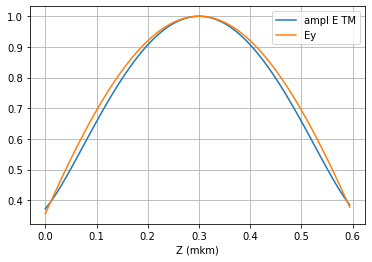

In [9]:

lam = 1
beta_TM = sol_mode_eq(lam, mode='TM')
beta_TE = sol_mode_eq(lam, mode='TE')
E = get_E_field_TM(beta_TM, lam, Z)
Ey = get_E_field_TE(beta_TE, lam, Z)

Ey = Ey/np.max(np.abs(Ey))
max_E = np.max(np.sqrt(np.abs(np.imag(E[0])**2 + np.real(E[1])**2)))

E = (E[0]/max_E, E[1]/max_E)

# plt.plot(Z, np.imag(E[0]), label='Ex')
# plt.plot(Z, -np.real(E[1]), label='Ez')
plt.plot(Z, np.sqrt(np.abs(np.imag(E[0])**2 + np.real(E[1])**2)), label='ampl E TM')
plt.plot(Z, Ey, label='Ey')
plt.xlabel("Z (mkm)")
plt.grid()
plt.legend()

E[0].max()

In [ ]:
L = np.linspace(0.1, 40, 500)
beta = []
beta_q = []
E_dif = []

for lam in L:
    k = 2*np.pi/lam
    b = sol_mode_eq(lam, mode='TM')
    if b == None:
        beta.append(0)
        beta_q.append(0)

    else:
        q = np.sqrt(-b**2 + (k*n2)**2)
        beta.append(b/k)
        beta_q.append(q/b)
        E = get_E_field_TM(b, lam, Z)
        E_dif.append(np.imag(E[0]).max()/E[1].max())

fig, ax = plt.subplots(3, 1, figsize=(20, 12))

ax[0].plot(L, beta)
ax[0].plot(L, [1.5]*len(L))
ax[0].plot(L, [np.sqrt(5.5)]*len(L))
ax[0].set_ylabel('beta/k', size=20)

ax[1].plot(L, beta_q)
ax[1].set_ylabel('q/beta', size=20)
ax[2].plot(L, E_dif)
ax[2].set_ylabel('max(Ex)/max(Ez)', size=20)

ax[2].set_xlabel('lambda (mkm)', size=20)


In [ ]:
#just light in film

PSI = np.linspace(0, np.pi, 100)
PHI = np.linspace(0, np.pi, 100)
TorqueZ_TM = np.zeros((100, 100))
TorqueZ_TE = np.zeros((100, 100))
TorqueX_TM = np.zeros((100, 100))
TorqueX_TE = np.zeros((100, 100))
TorqueY_TM = np.zeros((100, 100))
TorqueY_TE = np.zeros((100, 100))

lam = 1
beta_TM = sol_mode_eq(lam, mode='TM')
beta_TE = sol_mode_eq(lam, mode='TE')
Z  = np.arange(0, width, width/100)

for i, psi in enumerate(PSI):
    for j, phi in enumerate(PHI):
        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 1e-3
        M = (m1, m2, m3)

        E_TM = (1j, 1)

        E_TE = 1

        H_TM_p = ICME_TM(E_TM, phi, M)
        H_TE_p = ICME_TE(E_TE, phi, M)

        TorqueZ_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2]
        TorqueZ_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2]
        TorqueX_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[0]
        TorqueX_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[0]
        TorqueY_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[1]
        TorqueY_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[1]

fig, ax = plt.subplots(3, 2, figsize=(30, 30))
cmap = plt.get_cmap(name='inferno')
cmap2 = plt.get_cmap(name='Pastel1')
PHI, PSI = np.meshgrid(PHI, PSI)

#TE
ax[0][0].set_title('Torque_z for TE')
ax[1][0].set_title('Torque_y for TE')
ax[2][0].set_title('Torque_x for TE')
cf0 = ax[0][0].contourf(PHI, PSI, TorqueZ_TE, 200, cmap=cmap)
ax[0][0].contourf(PHI, PSI, TorqueZ_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf0, ax=ax[0][0])
cf01 = ax[1][0].contourf(PHI, PSI, TorqueY_TE, 200, cmap=cmap)
ax[1][0].contourf(PHI, PSI, TorqueY_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf01, ax=ax[1][0])
cf02 = ax[2][0].contourf(PHI, PSI, TorqueX_TE, 200, cmap=cmap)
ax[2][0].contourf(PHI, PSI, TorqueX_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf02, ax=ax[2][0])

#TM
ax[0][1].set_title('Torque_z for TM')
ax[1][1].set_title('Torque_y for TM')
ax[2][1].set_title('Torque_x for TM')
cf1 = ax[0][1].contourf(PHI, PSI, TorqueZ_TM, 200, cmap=cmap)
ax[0][1].contourf(PHI, PSI, TorqueZ_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf1, ax=ax[0][1])
cf11 = ax[1][1].contourf(PHI, PSI, TorqueY_TM, 200, cmap=cmap)
ax[1][1].contourf(PHI, PSI, TorqueY_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf11, ax=ax[1][1])
cf12 = ax[2][1].contourf(PHI, PSI, TorqueX_TM, 200, cmap=cmap)
ax[2][1].contourf(PHI, PSI, TorqueX_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf12, ax=ax[2][1])

for ax__ in ax:
    for ax_ in ax__:
        ax_.set_ylabel('Psi (rad)')
        ax_.set_xlabel('Phi (rad)')

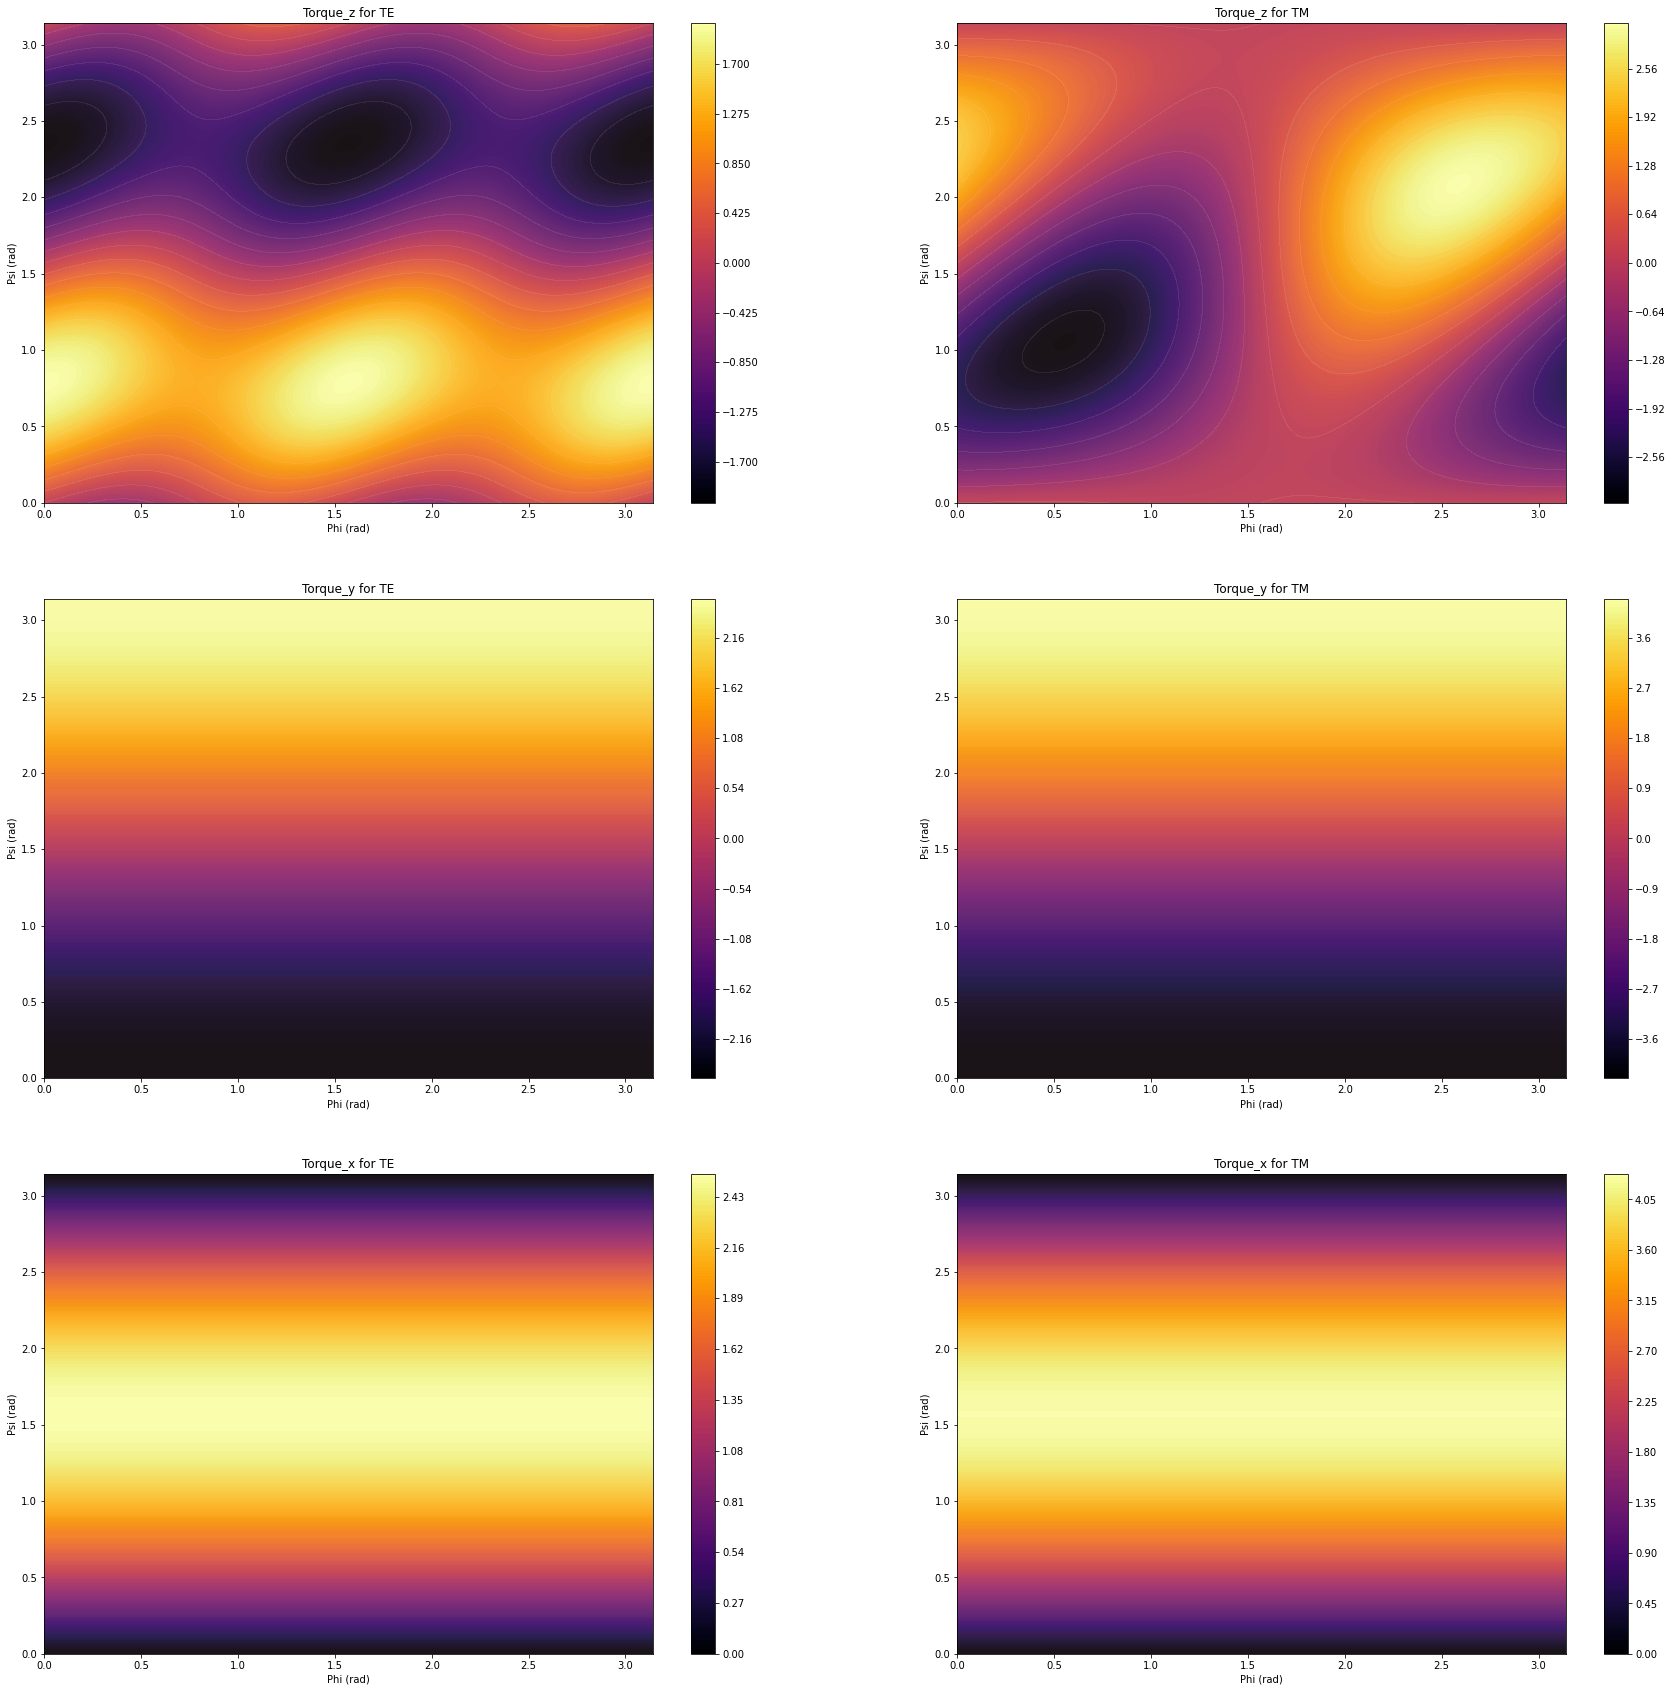

In [22]:
#mode

PSI = np.linspace(0, np.pi, 100)
PHI = np.linspace(0, np.pi, 100)
TorqueZ_TM = np.zeros((100, 100))
TorqueZ_TE = np.zeros((100, 100))
TorqueX_TM = np.zeros((100, 100))
TorqueX_TE = np.zeros((100, 100))
TorqueY_TM = np.zeros((100, 100))
TorqueY_TE = np.zeros((100, 100))

lam = 1
beta_TM = sol_mode_eq(lam, mode='TM')
beta_TE = sol_mode_eq(lam, mode='TE')
Z  = np.arange(0, width, width/100)

for i, psi in enumerate(PSI):
    for j, phi in enumerate(PHI):
        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0.5
        M = (m1, m2, m3)

        E_TM = get_E_field_TM(beta_TM, lam, Z)
        max_E = np.max(np.sqrt(np.abs(np.imag(E_TM[0])**2 + np.real(E_TM[1])**2)))
        E_TM = (E_TM[0]/max_E, E_TM[1]/max_E)

        E_TE = get_E_field_TE(beta_TE, lam, Z)
        E_TE = E_TE/np.max(np.abs(E_TE))

        H_TM_p = np.mean(ICME_TM(E_TM, phi, M), axis=1)
        H_TE_p = np.mean(ICME_TE(E_TE, phi, M), axis=1)

        TorqueZ_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2]
        TorqueZ_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2]
        TorqueX_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[0]
        TorqueX_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[0]
        TorqueY_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[1]
        TorqueY_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[1]

fig, ax = plt.subplots(3, 2, figsize=(30, 30))
cmap = plt.get_cmap(name='inferno')
cmap2 = plt.get_cmap(name='Pastel1')
PHI, PSI = np.meshgrid(PHI, PSI)

#TE
ax[0][0].set_title('Torque_z for TE')
ax[1][0].set_title('Torque_y for TE')
ax[2][0].set_title('Torque_x for TE')
cf0 = ax[0][0].contourf(PHI, PSI, TorqueZ_TE, 200, cmap=cmap)
ax[0][0].contourf(PHI, PSI, TorqueZ_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf0, ax=ax[0][0])
cf01 = ax[1][0].contourf(PHI, PSI, TorqueY_TE, 200, cmap=cmap)
ax[1][0].contourf(PHI, PSI, TorqueY_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf01, ax=ax[1][0])
cf02 = ax[2][0].contourf(PHI, PSI, TorqueX_TE, 200, cmap=cmap)
ax[2][0].contourf(PHI, PSI, TorqueX_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf02, ax=ax[2][0])

#TM
ax[0][1].set_title('Torque_z for TM')
ax[1][1].set_title('Torque_y for TM')
ax[2][1].set_title('Torque_x for TM')
cf1 = ax[0][1].contourf(PHI, PSI, TorqueZ_TM, 200, cmap=cmap)
ax[0][1].contourf(PHI, PSI, TorqueZ_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf1, ax=ax[0][1])
cf11 = ax[1][1].contourf(PHI, PSI, TorqueY_TM, 200, cmap=cmap)
ax[1][1].contourf(PHI, PSI, TorqueY_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf11, ax=ax[1][1])
cf12 = ax[2][1].contourf(PHI, PSI, TorqueX_TM, 200, cmap=cmap)
ax[2][1].contourf(PHI, PSI, TorqueX_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf12, ax=ax[2][1])

for ax__ in ax:
    for ax_ in ax__:
        ax_.set_ylabel('Psi (rad)')
        ax_.set_xlabel('Phi (rad)')

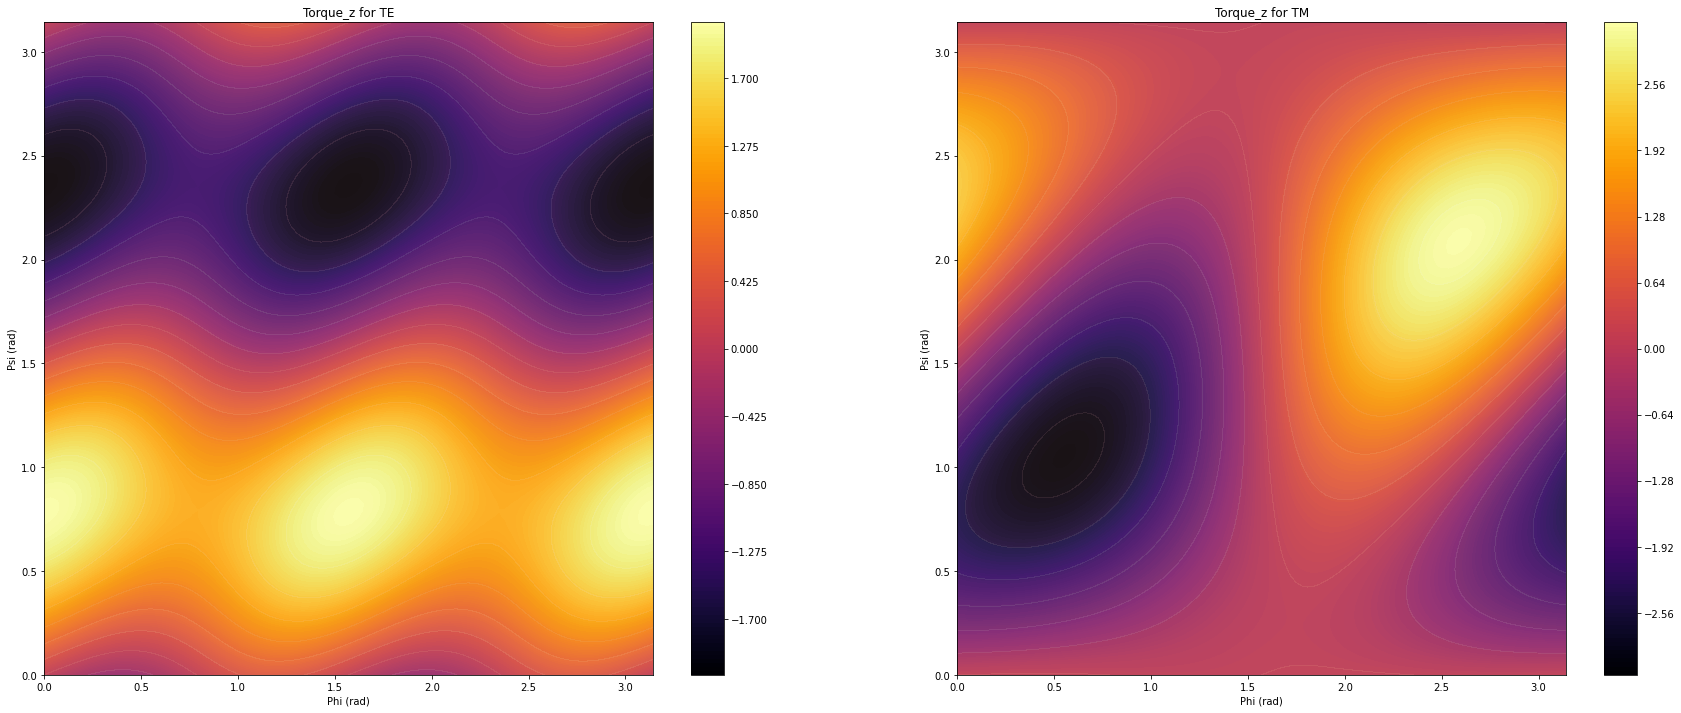

In [17]:
PSI = np.linspace(0, np.pi, 100)
PHI = np.linspace(0, np.pi, 100)
TorqueZ_TM = np.zeros((100, 100))
TorqueZ_TE = np.zeros((100, 100))

lam = 1
beta_TM = sol_mode_eq(lam, mode='TM')
beta_TE = sol_mode_eq(lam, mode='TE')
Z  = np.arange(0, width, width/100)

for i, psi in enumerate(PSI):
    for j, phi in enumerate(PHI):
        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0.5
        M = (m1, m2, m3)
        
        E_TM = get_E_field_TM(beta_TM, lam, Z)
        max_E = np.max(np.sqrt(np.abs(np.imag(E_TM[0])**2 + np.real(E_TM[1])**2)))
        E_TM = (E_TM[0]/max_E, E_TM[1]/max_E)

        E_TE = get_E_field_TE(beta_TE, lam, Z)
        E_TE = E_TE/np.max(np.abs(E_TE))

        H_TM_p = np.mean(ICME_TM(E_TM, phi, M), axis=1)
        H_TE_p = np.mean(ICME_TE(E_TE, phi, M), axis=1)

        TorqueZ_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2]
        TorqueZ_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2]

fig, ax = plt.subplots(1, 2, figsize=(30, 12))
cmap = plt.get_cmap(name='inferno')
cmap2 = plt.get_cmap(name='Pastel1')
PHI, PSI = np.meshgrid(PHI, PSI)

#TE
ax[0].set_title('Torque_z for TE')
cf0 = ax[0].contourf(PHI, PSI, TorqueZ_TE, 200, cmap=cmap)
ax[0].contourf(PHI, PSI, TorqueZ_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf0, ax=ax[0])

#TM
ax[1].set_title('Torque_z for TM')
cf1 = ax[1].contourf(PHI, PSI, TorqueZ_TM, 200, cmap=cmap)
ax[1].contourf(PHI, PSI, TorqueZ_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf1, ax=ax[1])

for ax_ in ax:
    ax_.set_ylabel('Psi (rad)')
    ax_.set_xlabel('Phi (rad)')

In [ ]:
THETA = np.linspace(0, np.pi, 100)
PHI = np.linspace(0, np.pi, 100)

TorqueZ_TE = np.zeros((100, 100))
TorqueZ_TM = np.zeros((100, 100))

Z  = np.arange(0, width, width/100)

for i, theta in enumerate(THETA):
    for j, phi_ in enumerate(PHI):
        phi = phi_
        psi = - theta + phi_

        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0
        M = (m1, m2, m3)

        beta_TM = sol_mode_eq(lam, mode='TM')
        
        E_TM = get_E_field_TM(beta_TM, lam, Z)
        max_E = np.max(np.sqrt(np.abs(np.imag(E_TM[0])**2 + np.real(E_TM[1])**2)))
        E_TM = (E_TM[0]/max_E, E_TM[1]/max_E)

        H_TM_p = np.mean(ICME_TM(E_TM, phi, M), axis=1)

        TorqueZ_TM[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2]

for i, theta in enumerate(THETA):
    for j, phi_ in enumerate(PHI):
        phi = - phi_ + np.pi/2
        psi = (np.pi/2 - theta - phi_)

        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0
        M = (m1, m2, m3)

        beta_TE = sol_mode_eq(lam, mode='TE')

        E_TE = get_E_field_TE(beta_TE, lam, Z)
        E_TE = E_TE/np.max(np.abs(E_TE))

        H_TE_p = np.mean(ICME_TE(E_TE, phi, M), axis=1)
        
        TorqueZ_TE[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2]


fig, ax = plt.subplots(1, 2, figsize=(30, 12))
cmap = plt.get_cmap(name='inferno')
cmap2 = plt.get_cmap(name='Pastel1')
PHI, THETA = np.meshgrid(PHI, THETA)

#TE
ax[0].set_title('|Torque_z| for TE')
cf0 = ax[0].contourf(PHI, THETA, TorqueZ_TE, 200, cmap=cmap)
# ax[0].contourf(PSI, PHI, TorqueZ_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf0, ax=ax[0])

#TM
ax[1].set_title('Torque_z for TM')
cf1 = ax[1].contourf(PHI, THETA, TorqueZ_TM, 200, cmap=cmap)
# ax[1].contourf(PHI, PSI_PHI, TorqueZ_TM, 10, cmap=cmap2, alpha=0.4)
# ax[1].contourf(PSI, PHI, TorqueZ_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf1, ax=ax[1])

for ax_ in ax:
    ax_.set_xlabel('Phi (rad)')
    ax_.set_ylabel('Theta (rad)')
        

In [ ]:
THETA = np.linspace(0, np.pi, 100)
PHI = np.linspace(0, np.pi, 100)

TorqueZ_TE1 = np.zeros((100, 100))
TorqueZ_TM1 = np.zeros((100, 100))

full_torque = [[]]

Z  = np.arange(0, width, width/100)

for i, theta in enumerate(THETA):
    for j, phi_ in enumerate(PHI):
        psi = phi_
        phi = - theta + phi_

        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0
        M = (m1, m2, m3)
        
        E_TM = (1j, 0)

        H_TM_p = ICME_TM(E_TM, phi, M)

        TorqueZ_TM1[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TM_p)[2]


for i, theta in enumerate(THETA):
    for j, phi_ in enumerate(PHI):
        psi = phi_ - np.pi/2
        phi = - theta + phi_

        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 0
        M = (m1, m2, m3)

        E_TE = 1

        H_TE_p = ICME_TE(E_TE, phi, M)
        
        TorqueZ_TE1[i, j] = np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2]


fig, ax = plt.subplots(1, 2, figsize=(30, 12))
cmap = plt.get_cmap(name='inferno')
cmap2 = plt.get_cmap(name='Pastel1')
PHI, THETA = np.meshgrid(PHI, THETA)

#TE
ax[0].set_title('Torque_z for TE')
cf0 = ax[0].contourf(PHI, THETA, TorqueZ_TE1, 200, cmap=cmap)
# ax[0].contourf(PSI, PHI, TorqueZ_TE, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf0, ax=ax[0])

#TM
ax[1].set_title('Torque_z for TM')
cf1 = ax[1].contourf(PHI, THETA, TorqueZ_TM1, 200, cmap=cmap)
# ax[1].contourf(PHI, PSI_PHI, TorqueZ_TM, 10, cmap=cmap2, alpha=0.4)
# ax[1].contourf(PSI, PHI, TorqueZ_TM, 14, cmap=cmap2, alpha=0.1)
fig.colorbar(cf1, ax=ax[1])

for ax_ in ax:
    ax_.set_xlabel('Phi (rad)')
    ax_.set_ylabel('Theta (rad)')
        

In [ ]:
section = int(99*1/4)

plt.plot(PHI[0,:], TorqueZ_TM[section,:], label='TE')
plt.plot(PHI[0,:], TorqueZ_TE[section,:], label='TM')
plt.legend()

In [ ]:
t1 = TorqueZ_TM
t2 = TorqueZ_TM1
t1 = (t1 - t1.mean())/t1.max()
t2 = (t2 - t2.mean())/t2.max()
tdiff = t1 - t2


In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(39, 10))
cmap = plt.get_cmap(name='inferno')

ax[0].set_title('Mode')
cf0 = ax[0].contourf(PHI, THETA, t1, 100, cmap=cmap)
fig.colorbar(cf0, ax=ax[0])

ax[1].set_title('Light')
cf1 = ax[1].contourf(PHI, THETA, t2, 100, cmap=cmap)
fig.colorbar(cf1, ax=ax[1])

ax[2].set_title('Diff')
cf2 = ax[2].contourf(PHI, THETA, tdiff, 100, cmap=cmap)
fig.colorbar(cf2, ax=ax[2])

for ax_ in ax:
    ax_.set_xlabel('Phi (rad)')
    ax_.set_ylabel('Theta (rad)')

In [ ]:
#china compare
fig, ax = plt.subplots(figsize = (16, 10))
for i in [1, 30, 45, 60]:
    PHI = np.linspace(-1/2*np.pi, np.pi/2, 200)
    t_TE = []
    shift = i/180*np.pi

    for phi in PHI:
        psi = phi - shift

        H_ext = 1
        m1 = H_ext*np.cos(phi-psi)
        m2 = -H_ext*np.sin(phi-psi)
        m3 = 1e-3       # be carefull with phi close to 0 and 90
        M = (m1, m2, m3)

        E_TE = 1
        H_TE_p = ICME_TE(E_TE, phi, M)
        t_TE.append(np.cross(np.array([np.cos(psi), np.sin(psi), 0]), H_TE_p)[2])

    
    ax.plot(np.linspace(0, np.pi, 200), np.abs(t_TE), label=f"Theta is {i} deg")
ax.grid()
ax.set_ylabel("Torque_z", size=20)
ax.set_xlabel("Phi (rad)", size=20)
ax.legend(fontsize=16)

    